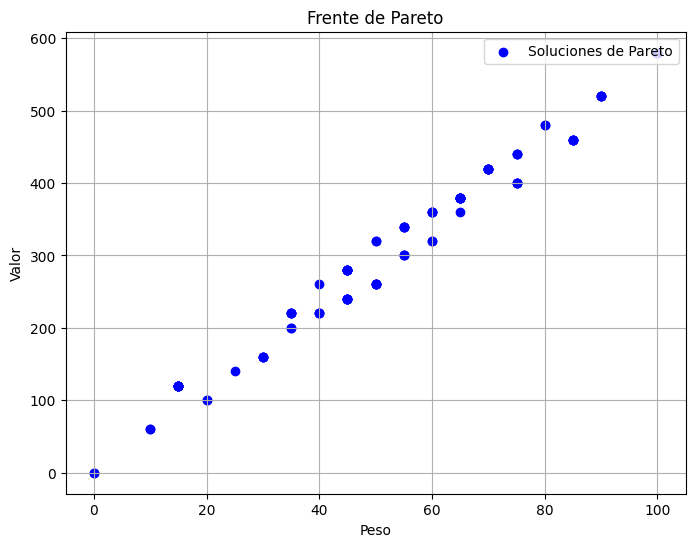

In [ ]:
import random
import matplotlib.pyplot as plt

# Definir los parámetros
tamano_poblacion = 100
num_generaciones = 100
prob_mutacion = 0.1
tamano_torneo = 2

# Definir la capacidad de la mochila y los pesos y valores de los elementos
capacidad_mochila = 50
pesos_elementos = [10, 20, 15, 25, 30]
valores_elementos = [60, 100, 120, 140, 160]
num_elementos = len(pesos_elementos)

# Función de inicialización de la población
def inicializar_poblacion(tamano_poblacion, num_elementos):
    poblacion = []
    for _ in range(tamano_poblacion):
        cromosoma = [random.randint(0, 1) for _ in range(num_elementos)]
        poblacion.append(cromosoma)
    return poblacion

# Función de evaluación de un cromosoma
def evaluar_cromosoma(cromosoma):
    peso_total = sum(cromosoma[i] * pesos_elementos[i] for i in range(num_elementos))
    valor_total = sum(cromosoma[i] * valores_elementos[i] for i in range(num_elementos))
    return valor_total, peso_total

# Función de selección por torneo
def seleccion_torneo(poblacion, tamano_torneo):
    seleccionados = []
    for _ in range(len(poblacion)):
        torneo = random.sample(poblacion, tamano_torneo)
        mejor_cromosoma = max(torneo, key=lambda x: evaluar_cromosoma(x))
        seleccionados.append(mejor_cromosoma)
    return seleccionados

# Función de cruce (crossover) de un par de cromosomas
def crossover(cromosoma1, cromosoma2):
    punto_corte = random.randint(1, len(cromosoma1) - 1)
    hijo1 = cromosoma1[:punto_corte] + cromosoma2[punto_corte:]
    hijo2 = cromosoma2[:punto_corte] + cromosoma1[punto_corte:]
    return hijo1, hijo2

# Función de mutación de un cromosoma
def mutacion(cromosoma, prob_mutacion):
    for i in range(len(cromosoma)):
        if random.random() < prob_mutacion:
            cromosoma[i] = 1 - cromosoma[i]  # Cambiar 0 a 1 o viceversa
    return cromosoma

# Algoritmo principal de NSGA-II
def nsga2(capacidad_mochila, pesos_elementos, valores_elementos, tamano_poblacion, num_generaciones, prob_mutacion, tamano_torneo):
    poblacion = inicializar_poblacion(tamano_poblacion, num_elementos)

    frente_pareto = []  # Almacenar el frente de Pareto

    for generacion in range(num_generaciones):
        # Evaluación y selección
        poblacion_evaluada = [(cromosoma, evaluar_cromosoma(cromosoma)) for cromosoma in poblacion]
        poblacion_evaluada.sort(key=lambda x: x[1], reverse=True)  # Ordenar por valor descendente

        # Agregar al frente de Pareto
        if generacion == num_generaciones - 1:
            frente_pareto = [solucion[1] for solucion in poblacion_evaluada]

        # Cruzar y mutar
        descendencia = []
        while len(descendencia) < tamano_poblacion:
            padre1, padre2 = random.choices(poblacion_evaluada, k=2)
            hijo1, hijo2 = crossover(padre1[0], padre2[0])
            hijo1 = mutacion(hijo1, prob_mutacion)
            hijo2 = mutacion(hijo2, prob_mutacion)
            descendencia.extend([hijo1, hijo2])

        poblacion = descendencia[:tamano_poblacion]

    return frente_pareto

# Ejecutar el algoritmo
frente_pareto = nsga2(capacidad_mochila, pesos_elementos, valores_elementos, tamano_poblacion, num_generaciones, prob_mutacion, tamano_torneo)

# Extraer valores y pesos del frente de Pareto
valores_pareto = [solucion[0] for solucion in frente_pareto]
pesos_pareto = [solucion[1] for solucion in frente_pareto]

# Crear el gráfico del frente de Pareto
plt.figure(figsize=(8, 6))
plt.scatter(pesos_pareto, valores_pareto, c='b', marker='o', label='Soluciones de Pareto')
plt.xlabel('Peso')
plt.ylabel('Valor')
plt.title('Frente de Pareto')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
